In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# chicago problem

In [ ]:
# seeing content of file chicago
!head -3 Current_Employee_Names__Salaries__and_Position_Titles.csv

In [ ]:
def func(x):
    if type(x) == str:
        return float(x.replace('$',''))
    else:
        return np.nan
    
chicago = pd.read_csv('Current_Employee_Names__Salaries__and_Position_Titles.csv', usecols=[0, 1, 2, 6])

chicago.head()

In [ ]:
# convert 'Annual Salary' columns to float

chicago['Annual Salary']=chicago['Annual Salary'].apply(func)

chicago.head()

In [ ]:
# information about each column
chicago.info()

In [ ]:
by_dept= chicago.groupby('Department')

# count() function is applied along all each column
by_dept.count().head()

In [ ]:
# apply mean on numerical columns
by_dept.mean().head()

In [ ]:
# appling count to particular column
by_dept['Annual Salary'].count().head()

In [ ]:
# appling count to particular column using agg() function
by_dept.agg({'Annual Salary': 'count'}).head()

In [ ]:
# sort salarys columns
chicago= chicago.sort_values('Annual Salary',  ascending=False).groupby('Department')

In [ ]:
def ranking(x):
    x['rank_col'] = np.arange(len(x)) + 1
    return x
df= chicago.apply(ranking)

# top salarys in each departments
x= df[df['rank_col'] < 6]#.groupby('Department')
x.pivot_table(index='Department', columns='rank_col', values='Annual Salary').head()

In [ ]:
# to see Department LAW
df[df['Department'] == 'LAW'].head()

# movie lens problem

In [ ]:
!head -3 u.data

In [ ]:
# reading rating file
rate_col=['user_id', 'item_id', 'rating', 'timestamp']
rating= pd.read_csv('u.data',sep='\t', names= rate_col, index_col='user_id')
rating.head()

In [ ]:
!head -3 u.item

In [ ]:
# reading movie file
movie_col=['movie_id', 'movie_title', 'IMDB_id', ]
movie= pd.read_csv('u.item', sep='|', usecols=[0, 1, 4], names=movie_col, encoding='latin-1', index_col='movie_id')
movie.head()

In [ ]:
!head -3 u.user

In [ ]:
# reading user file
user_col=['user_id', 'age', 'gender', 'occupation','zip_code']
user=pd.read_csv('u.user', names=user_col, sep='|', index_col= 'user_id')
user.head()

In [ ]:
# merge 'movie' and 'rating' DataFrams
movie_rating= pd.merge(movie, rating, left_index=True, right_on='item_id')
movie_rating.head()

In [ ]:
# top 5 rated movies atleast by 100 users
df = movie_rating.groupby('movie_title').agg({'rating': [np.size, np.mean]})
top_20_rated=df[df[('rating', 'size')]>100].sort_values(('rating', 'mean'), ascending=False).head(20)
top_20_rated.head()

In [ ]:
# merging movie_rating and user DataFrame
lens = pd.merge(movie_rating,user, left_index=True, right_index=True)
lens.head(3)

In [ ]:
# create age groups 
label = ['0-9', '10-19', '20-29','30-39','40-49','50-59','60-69','70-79']
lens['age_group']=pd.cut(lens.age, range(0,81,10), right=False, labels=label)

In [ ]:
lens.head()

In [ ]:
# top 5 high rated movies between ages 20-29
df = lens.groupby(['age_group','movie_title']).agg({'rating': [np.size, np.mean]})
df[df[('rating', 'size')]>100].loc['20-29'].sort_values(('rating', 'mean'), ascending=False).head()

In [ ]:
# movie rating by age_group
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

In [ ]:
# movie rating by different age groups
df= lens.groupby(['age_group','movie_title']).agg( np.mean )
df.unstack(level=0).fillna(0)['rating'].head()

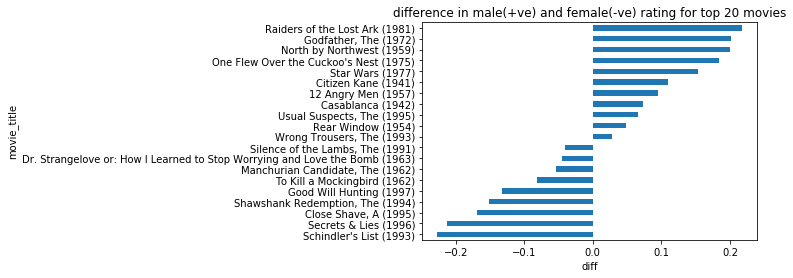

In [63]:
# difference in male and female rating for top 20 movies
df = lens.groupby(['movie_title', 'gender']).agg({'rating': np.mean}).unstack().fillna(0)
df['diff'] = df[('rating', 'M')] - df[('rating', 'F')]
df[df.index.isin(top_20_rated.index)].sort_values('diff', ascending=True)['diff'].plot(kind='barh')
plt.title('difference in male(+ve) and female(-ve) rating for top 20 movies')
plt.xlabel('diff')
plt.show()